# Лабораторная работа 3


**Тема**: Обработка признаков (часть 2)

**Курс**: Методы машинного обучения

**Группа**: ИУ5-23М

**Студент**: Костарев А. П.

## Цель

Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание

1.	Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.

2.	Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  1. масштабирование признаков (не менее чем тремя способами);

  1. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

  1. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  
  1. отбор признаков:
    - один метод из группы методов фильтрации (filter methods);
    - один метод из группы методов обертывания (wrapper methods);
    - один метод из группы методов вложений (embedded methods).



## Выполнение задания

### Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные о смартфонах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/informrohit1/smartphones-dataset

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso
import seaborn as sns
import warnings
import math
warnings.simplefilter('ignore')

### Загрузка данных

In [2]:
data = pd.read_csv('smartphones_cleaned_v6.csv')

Выведем первые строки

In [3]:
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


Выведем типы данных для всех столбцов

In [5]:
data.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width               int64
resolution_height              int64
dtype: object

### Обработка нестандартных признаков

#### Признак model
Извлечем бренд смартфона из модели

In [8]:
data['brand'] = data['model'].apply(lambda x: x.split()[0])
data[['brand', 'model']].head()

,brand,model
0,OnePlus,OnePlus 11 5G
1,OnePlus,OnePlus Nord CE 2 Lite 5G
2,Samsung,Samsung Galaxy A14 5G
3,Motorola,Motorola Moto G62 5G
4,Realme,Realme 10 Pro Plus


### Масштабирование признаков

In [53]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != object]

In [54]:
numeric_columns

['price',
 'rating',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'fast_charging',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'num_front_cameras',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'extended_upto',
 'resolution_width',
 'resolution_height']

StandardScaler

In [11]:
data1 = pd.DataFrame(StandardScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data1.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,0.568908,1.451855,0.886038,1.222145,-0.440075,0.272504,1.666046,0.180623,0.413338,1.572703,...,0.467743,0.957568,0.239309,-0.174994,-0.009680,-0.054192,-1.306592,NaN,1.255610,1.939746
1,-0.317160,0.370575,0.886038,-0.818233,-0.440075,0.272504,-0.489860,0.180623,0.413338,-0.383183,...,0.152542,0.957568,0.239309,-0.174994,0.414767,-0.054192,0.765350,0.785577,0.014302,0.382272
2,-0.405488,-0.440385,0.886038,-0.818233,-0.440075,0.272504,-0.058678,0.180623,0.413338,-0.908644,...,0.181197,-0.077869,0.239309,-0.174994,-0.009680,-0.330149,0.765350,0.785577,0.014302,0.374523
3,-0.443452,0.370575,0.886038,-0.818233,-0.440075,0.272504,-0.489860,0.180623,0.413338,NaN,...,0.037924,0.957568,0.239309,-0.174994,-0.009680,-0.054192,0.765350,0.785577,0.014302,0.359026
4,-0.190362,0.505735,0.886038,-0.818233,-0.440075,0.272504,0.372503,0.180623,0.413338,0.609357,...,0.467743,0.957568,0.239309,-0.174994,1.748742,-0.054192,-1.306592,NaN,0.014302,0.382272


In [12]:
data1.describe()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,9.800000e+02,8.790000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.740000e+02,9.380000e+02,9.690000e+02,9.800000e+02,7.690000e+02,...,9.800000e+02,9.800000e+02,9.800000e+02,9.760000e+02,9.800000e+02,9.750000e+02,9.800000e+02,5.000000e+02,9.800000e+02,9.800000e+02
mean,-1.631348e-17,8.083535e-18,2.030122e-16,-5.800349e-17,3.625218e-17,-3.934795e-16,-4.317797e-16,-1.466548e-16,-7.975480e-17,7.622858e-17,...,-2.996243e-15,-1.160070e-16,-3.117688e-16,2.311448e-16,2.610157e-16,3.643809e-16,-2.718914e-17,7.105427e-17,8.609893e-17,7.250436e-17
std,1.000511e+00,1.000569e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000514e+00,1.000533e+00,1.000516e+00,1.000511e+00,1.000651e+00,...,1.000511e+00,1.000511e+00,1.000511e+00,1.000513e+00,1.000511e+00,1.000513e+00,1.000511e+00,1.001002e+00,1.000511e+00,1.000511e+00
min,-7.345052e-01,-2.467784e+00,-1.128619e+00,-8.182334e-01,-4.400753e-01,-4.509812e+00,-2.645766e+00,-2.969962e+00,-2.419328e+00,-1.054606e+00,...,-8.587128e+00,-1.113307e+00,-2.337863e+00,-1.749943e-01,-1.464925e+00,-1.498371e+00,-1.306592e+00,-1.920902e+00,-2.054543e+00,-3.360313e+00
25%,-4.940697e-01,-5.755445e-01,-1.128619e+00,-8.182334e-01,-4.400753e-01,2.725036e-01,-8.132454e-01,-3.149080e-01,4.133380e-01,-8.210675e-01,...,-1.053497e-01,-1.113307e+00,-1.049277e+00,-1.749943e-01,-7.979379e-01,-7.900793e-01,-1.306592e+00,-6.113151e-01,1.430248e-02,-1.167453e+00
50%,-3.170206e-01,2.354151e-01,8.860382e-01,-8.182334e-01,-4.400753e-01,2.725036e-01,-2.742689e-01,1.806228e-01,4.133380e-01,-3.831825e-01,...,1.238875e-01,-7.786913e-02,2.393088e-01,-1.749943e-01,-9.679981e-03,-5.419153e-02,7.653499e-01,7.855775e-01,1.430248e-02,3.590262e-01
75%,7.519293e-02,7.760548e-01,8.860382e-01,1.222145e+00,-4.400753e-01,2.725036e-01,8.899203e-01,1.806228e-01,4.133380e-01,5.801643e-01,...,3.817794e-01,9.575684e-01,2.393088e-01,-1.749943e-01,4.147666e-01,-5.419153e-02,7.653499e-01,7.855775e-01,1.430248e-02,3.745234e-01
max,1.562779e+01,1.451855e+00,8.860382e-01,1.222145e+00,2.272338e+00,2.725036e-01,1.709165e+00,1.702867e+01,4.133380e-01,5.659629e+00,...,4.278813e+00,5.099319e+00,1.527895e+00,5.714470e+00,4.537962e+00,3.993191e+00,7.653499e-01,3.579363e+00,4.772647e+00,3.148531e+00


MinMaxScaler

In [13]:
data2 = pd.DataFrame(MinMaxScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data2.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,0.079660,1.000000,1.0,1.0,0.0,1.0,0.990099,0.15754,1.0,0.391304,...,0.703786,0.333333,0.666667,0.0,0.242424,0.262982,0.0,NaN,0.484848,0.814286
1,0.025507,0.724138,1.0,0.0,0.0,1.0,0.495050,0.15754,1.0,0.100000,...,0.679287,0.333333,0.666667,0.0,0.313131,0.262982,1.0,0.492063,0.303030,0.575000
2,0.020108,0.517241,1.0,0.0,0.0,1.0,0.594059,0.15754,1.0,0.021739,...,0.681514,0.166667,0.666667,0.0,0.242424,0.212730,1.0,0.492063,0.303030,0.573810
3,0.017788,0.724138,1.0,0.0,0.0,1.0,0.495050,0.15754,1.0,NaN,...,0.670379,0.333333,0.666667,0.0,0.242424,0.262982,1.0,0.492063,0.303030,0.571429
4,0.033256,0.758621,1.0,0.0,0.0,1.0,0.693069,0.15754,1.0,0.247826,...,0.703786,0.333333,0.666667,0.0,0.535354,0.262982,0.0,NaN,0.303030,0.575000


In [14]:
data2.describe()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,980.000000,980.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,...,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,0.044890,0.629595,0.560204,0.401020,0.162245,0.943018,0.607533,0.148508,0.854082,0.157070,...,0.667431,0.179201,0.604762,0.029713,0.244037,0.272850,0.630612,0.349238,0.300935,0.516269
std,0.061147,0.255271,0.496616,0.490355,0.368864,0.209211,0.229747,0.050029,0.353205,0.149034,...,0.077764,0.161045,0.258814,0.169882,0.166672,0.182191,0.482885,0.181992,0.146548,0.153716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014694,0.482759,0.000000,0.000000,0.000000,1.000000,0.420792,0.132762,1.000000,0.034783,...,0.659243,0.000000,0.333333,0.000000,0.111111,0.128978,0.000000,0.238095,0.303030,0.336905
50%,0.025515,0.689655,1.000000,0.000000,0.000000,1.000000,0.544554,0.157540,1.000000,0.100000,...,0.677060,0.166667,0.666667,0.000000,0.242424,0.262982,1.000000,0.492063,0.303030,0.571429
75%,0.049486,0.827586,1.000000,1.000000,0.000000,1.000000,0.811881,0.157540,1.000000,0.243478,...,0.697105,0.333333,0.666667,0.000000,0.313131,0.262982,1.000000,0.492063,0.303030,0.573810
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


RobustScaler

In [15]:
data3 = pd.DataFrame(RobustScaler().fit_transform(data[numeric_columns]), columns=numeric_columns);
data3.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,1.556274,0.9,0.0,1.0,0.0,0.0,1.139241,0.0,0.0,1.395833,...,0.705882,0.5,0.0,0.0,0.00,0.000,-1.0,NaN,360.0,1.025126
1,-0.000245,0.1,0.0,0.0,0.0,0.0,-0.126582,0.0,0.0,0.000000,...,0.058824,0.5,0.0,0.0,0.35,0.000,0.0,0.0,0.0,0.015075
2,-0.155407,-0.5,0.0,0.0,0.0,0.0,0.126582,0.0,0.0,-0.375000,...,0.117647,0.0,0.0,0.0,0.00,-0.375,0.0,0.0,0.0,0.010050
3,-0.222096,0.1,0.0,0.0,0.0,0.0,-0.126582,0.0,0.0,NaN,...,-0.176471,0.5,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.000000
4,0.222496,0.2,0.0,0.0,0.0,0.0,0.379747,0.0,0.0,0.708333,...,0.705882,0.5,0.0,0.0,1.45,0.000,-1.0,NaN,0.0,0.015075


In [16]:
data3.describe()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,980.000000,980.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,...,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,0.556897,-0.174175,-0.439796,0.401020,0.162245,-0.227926,0.161035,-0.364504,-0.145918,0.273461,...,-0.254322,0.037602,-0.185714,0.029713,0.007982,0.073641,-0.369388,-0.562375,-4.147959,-0.232835
std,1.757555,0.740285,0.496616,0.490355,0.368864,0.836845,0.587455,2.019080,0.353205,0.714122,...,2.053892,0.483134,0.776441,0.169882,0.825024,1.359600,0.482885,0.716592,290.164931,0.648850
min,-0.733378,-2.000000,-1.000000,0.000000,0.000000,-4.000000,-1.392405,-6.358000,-1.000000,-0.479167,...,-17.882353,-0.500000,-2.000000,0.000000,-1.200000,-1.962500,-1.000000,-1.937500,-600.000000,-2.412060
25%,-0.311015,-0.600000,-1.000000,0.000000,0.000000,0.000000,-0.316456,-1.000000,0.000000,-0.312500,...,-0.470588,-0.500000,-1.000000,0.000000,-0.650000,-1.000000,-1.000000,-1.000000,0.000000,-0.989950
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.688985,0.400000,0.000000,1.000000,0.000000,0.000000,0.683544,0.000000,0.000000,0.687500,...,0.529412,0.500000,0.000000,0.000000,0.350000,0.000000,0.000000,0.000000,0.000000,0.010050
max,28.009581,0.900000,0.000000,1.000000,1.000000,0.000000,1.164557,34.000000,0.000000,4.312500,...,8.529412,2.500000,1.000000,1.000000,3.750000,5.500000,0.000000,2.000000,1380.000000,1.809045


### Обработка выбросов для числовых признаков

Замена выбросов

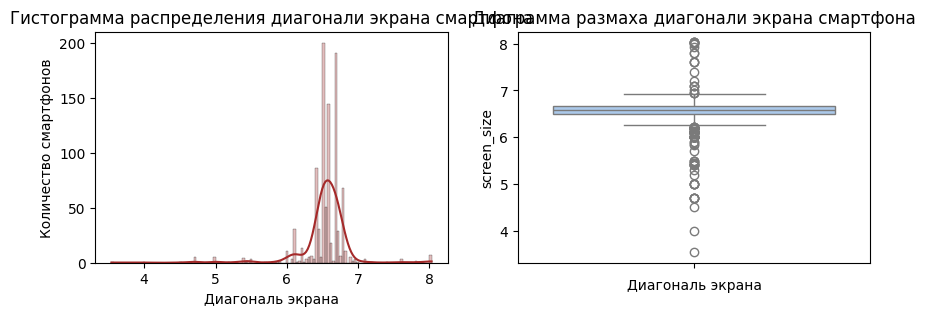

In [18]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['screen_size'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения диагонали экрана смартфона")
axes[0].set_xlabel('Диагональ экрана')
axes[0].set_ylabel('Количество смартфонов')
sns.boxplot(data['screen_size'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха диагонали экрана смартфона")
axes[1].set_xlabel('Диагональ экрана')
plt.show();

In [19]:
K = 1.5
col = 'screen_size'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(6.24, 6.92)

In [20]:
data[col] = np.where(data[col] > upper_boundary, upper_boundary, np.where(data[col] < lower_boundary, lower_boundary, data[col]))

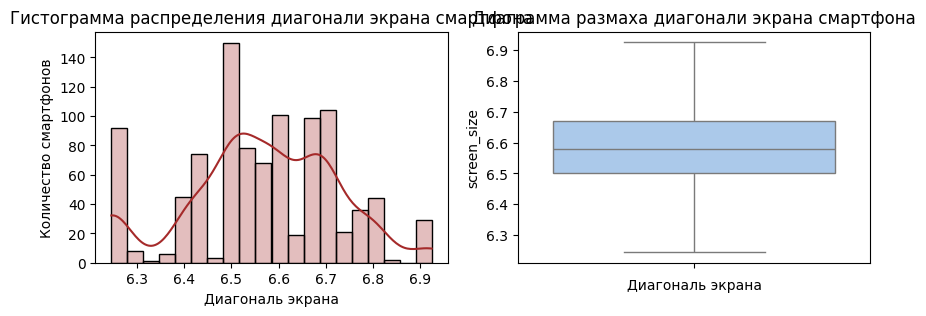

In [21]:
fig = plt.figure(figsize=(10, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['screen_size'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения диагонали экрана смартфона")
axes[0].set_xlabel('Диагональ экрана')
axes[0].set_ylabel('Количество смартфонов')
sns.boxplot(data['screen_size'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха диагонали экрана смартфона")
axes[1].set_xlabel('Диагональ экрана')
plt.show();

Удаление выбросов

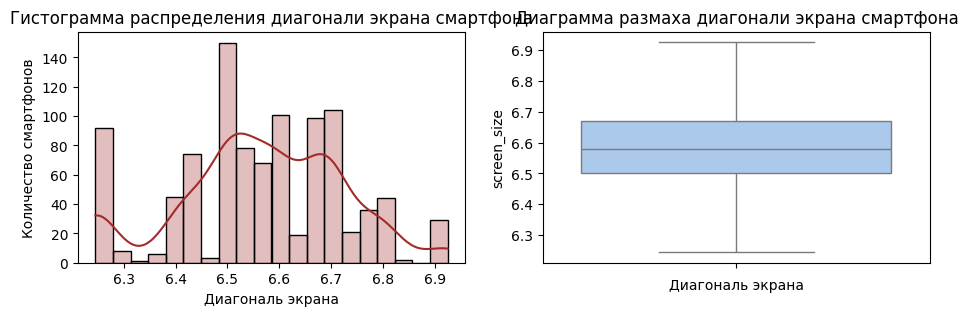

In [22]:
fig = plt.figure(figsize=(11, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['screen_size'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения диагонали экрана смартфона")
axes[0].set_xlabel('Диагональ экрана')
axes[0].set_ylabel('Количество смартфонов')
sns.boxplot(data['screen_size'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха диагонали экрана смартфона")
axes[1].set_xlabel('Диагональ экрана')
plt.show();

In [23]:
K = 1.5
col = 'screen_size'
IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
lower_boundary = data[col].quantile(0.25) - (K * IQR)
upper_boundary = data[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(6.24, 6.92)

In [24]:
data = data[data['screen_size'] < 6.7]

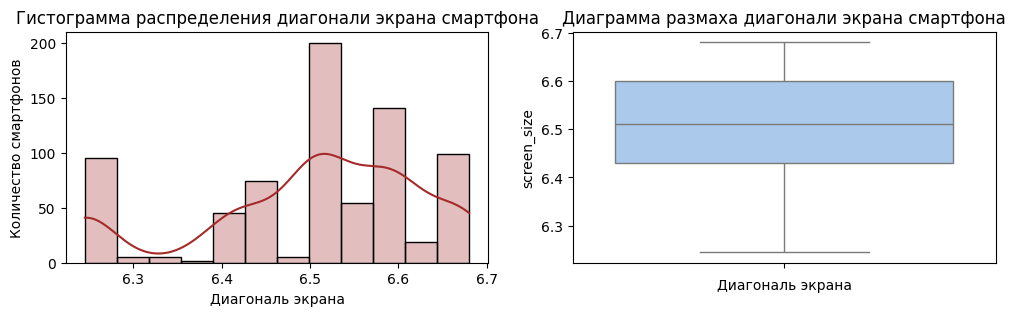

In [25]:
fig = plt.figure(figsize=(12, 3))
axes = fig.subplots(1, 2)
sns.histplot(data['screen_size'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения диагонали экрана смартфона")
axes[0].set_xlabel('Диагональ экрана')
axes[0].set_ylabel('Количество смартфонов')
sns.boxplot(data['screen_size'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха диагонали экрана смартфона")
axes[1].set_xlabel('Диагональ экрана')
plt.show();

### Отбор признаков

#### Метод фильтрации

In [26]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 744
--------------------
brand_name: 41 уникальных значений

model: 744 уникальных значений

price: 304 уникальных значений

rating: 30 уникальных значений

has_5g: 2 уникальных значений

has_nfc: 2 уникальных значений

has_ir_blaster: 2 уникальных значений

processor_brand: 13 уникальных значений

num_cores: 3 уникальных значений

processor_speed: 33 уникальных значений

battery_capacity: 75 уникальных значений

fast_charging_available: 2 уникальных значений

fast_charging: 26 уникальных значений

ram_capacity: 8 уникальных значений

internal_memory: 8 уникальных значений

screen_size: 30 уникальных значений

refresh_rate: 5 уникальных значений

num_rear_cameras: 4 уникальных значений

num_front_cameras: 2 уникальных значений

os: 3 уникальных значений

primary_camera_rear: 17 уникальных значений

primary_camera_front: 20 уникальных значений

extended_memory_available: 2 уникальных значений

extended_upto: 7 уникальных значений

resolution_width: 26 уникальных значений


In [27]:
data.corr(numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.000000,0.207401,0.218119,0.402197,-0.027898,-0.042984,0.331532,-0.196158,0.064224,0.229018,...,-0.179014,0.152798,0.054015,0.075612,0.052032,0.127136,-0.351804,0.121159,0.161700,0.254797
rating,0.207401,1.000000,0.587020,0.400792,0.215583,0.210902,0.574429,-0.015366,0.558812,0.519832,...,0.171609,0.612430,0.545680,0.144226,0.619241,0.600467,-0.338149,0.319758,0.427523,0.680904
has_5g,0.218119,0.587020,1.000000,0.423263,0.136810,0.149805,0.558169,0.039992,0.354303,0.432207,...,0.214966,0.609029,0.187730,0.069818,0.368159,0.342136,-0.452606,0.394490,0.269223,0.477533
has_nfc,0.402197,0.400792,0.423263,1.000000,-0.042506,0.005469,0.521750,-0.172549,0.187257,0.298824,...,-0.121188,0.327862,0.099817,0.047523,0.131729,0.240113,-0.512930,0.169823,0.276909,0.325185
has_ir_blaster,-0.027898,0.215583,0.136810,-0.042506,1.000000,0.134397,0.128195,0.116897,0.208520,0.262773,...,0.329960,0.248753,0.250557,-0.027906,0.357000,0.034056,-0.062966,-0.050620,0.185410,0.257967
num_cores,-0.042984,0.210902,0.149805,0.005469,0.134397,1.000000,0.199674,0.290067,0.365532,0.130715,...,0.326652,0.249521,0.342391,0.044968,0.320306,0.226103,0.113861,0.205966,0.140487,0.304235
processor_speed,0.331532,0.574429,0.558169,0.521750,0.128195,0.199674,1.000000,-0.020050,0.323651,0.578523,...,0.116680,0.489837,0.238374,0.117243,0.315455,0.395796,-0.593411,0.264183,0.290298,0.502797
battery_capacity,-0.196158,-0.015366,0.039992,-0.172549,0.116897,0.290067,-0.020050,1.000000,0.146013,-0.094388,...,0.420789,0.132268,0.207588,-0.086284,0.208433,-0.004873,0.229638,0.320345,-0.004232,0.054274
fast_charging_available,0.064224,0.558812,0.354303,0.187257,0.208520,0.365532,0.323651,0.146013,1.000000,NaN,...,0.313398,0.426676,0.482213,0.073238,0.468017,0.353571,-0.115778,0.348187,0.315999,0.526623
fast_charging,0.229018,0.519832,0.432207,0.298824,0.262773,0.130715,0.578523,-0.094388,NaN,1.000000,...,0.321250,0.540193,0.156730,0.033561,0.571709,0.446101,-0.547540,0.033665,0.233789,0.286042


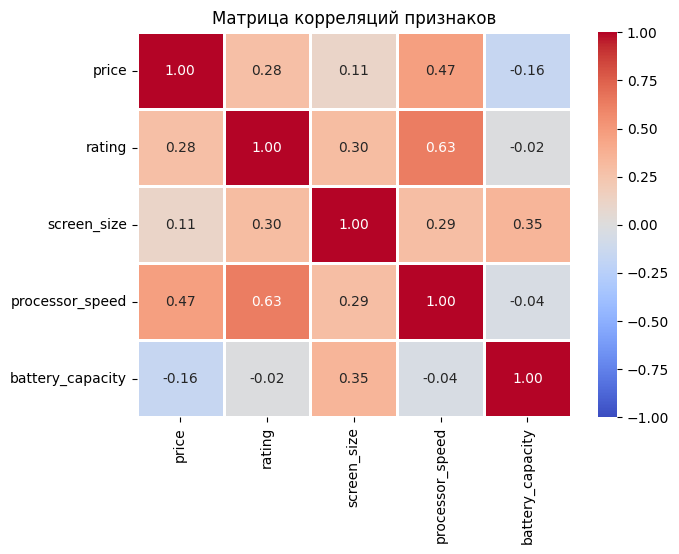

In [28]:
plt.figure(figsize=(7, 5))
sns.heatmap(data1[["price", "rating", "screen_size", "processor_speed", "battery_capacity"]].corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Матрица корреляций признаков');

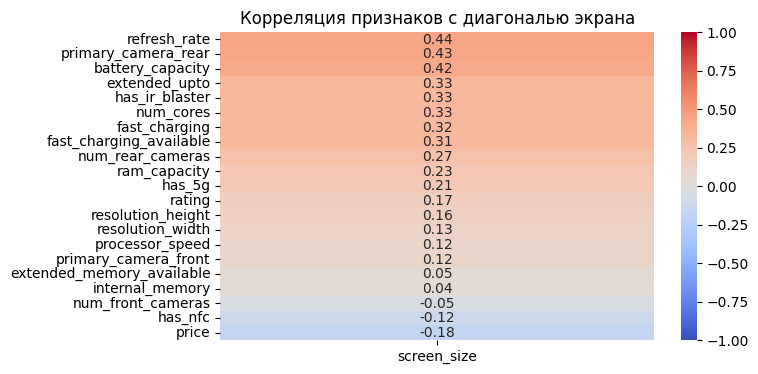

In [29]:
plt.figure(figsize=(7, 4))
sns.heatmap(pd.DataFrame(data.corr(numeric_only=True)['screen_size'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков с диагональю экрана');

In [30]:
columns1 = ['battery_capacity', 'internal_memory', 'processor_speed']
columns1

['battery_capacity', 'internal_memory', 'processor_speed']

#### Метод обертывания

In [55]:
numeric_columns.remove('screen_size')

In [63]:
Combi().fit(np.array(data[numeric_columns]), data['screen_size']).get_best_polynomial()

AttributeError: 'itertools.combinations' object has no attribute 'fit'

In [56]:
columns2 = [numeric_columns[i-1] for i in [1, 2, 4, 6, 7]]
columns2

['price', 'rating', 'has_nfc', 'num_cores', 'processor_speed']

### Метод вложений

In [49]:
e_ls1 = Lasso(random_state=1)
droppedNaData = data.dropna()
e_ls1.fit(droppedNaData[numeric_columns], droppedNaData['screen_size'])
list(zip(numeric_columns, e_ls1.coef_))

[('price', -2.4825884546531513e-06),
 ('rating', 0.0),
 ('has_5g', 0.0),
 ('has_nfc', -0.0),
 ('has_ir_blaster', 0.0),
 ('num_cores', -0.0),
 ('processor_speed', 0.0),
 ('battery_capacity', 7.425277932100224e-06),
 ('fast_charging_available', 0.0),
 ('fast_charging', 0.0),
 ('ram_capacity', 0.0),
 ('internal_memory', 0.0),
 ('refresh_rate', 0.0),
 ('num_rear_cameras', -0.0),
 ('num_front_cameras', -0.0),
 ('primary_camera_rear', 0.0),
 ('primary_camera_front', -0.0),
 ('extended_memory_available', 0.0),
 ('extended_upto', 4.8893509695198144e-05),
 ('resolution_width', 5.8953011377188094e-05),
 ('resolution_height', 3.36909683592544e-06)]

In [50]:
sel_e_ls1 = SelectFromModel(e_ls1)
droppedNaData = data.dropna()
sel_e_ls1.fit(droppedNaData[numeric_columns], droppedNaData['screen_size'])
list(zip(numeric_columns, sel_e_ls1.get_support()))

[('price', False),
 ('rating', False),
 ('has_5g', False),
 ('has_nfc', False),
 ('has_ir_blaster', False),
 ('num_cores', False),
 ('processor_speed', False),
 ('battery_capacity', False),
 ('fast_charging_available', False),
 ('fast_charging', False),
 ('ram_capacity', False),
 ('internal_memory', False),
 ('refresh_rate', False),
 ('num_rear_cameras', False),
 ('num_front_cameras', False),
 ('primary_camera_rear', False),
 ('primary_camera_front', False),
 ('extended_memory_available', False),
 ('extended_upto', True),
 ('resolution_width', True),
 ('resolution_height', False)]

In [51]:
columns3 = numeric_columns
columns3

['price',
 'rating',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'fast_charging',
 'ram_capacity',
 'internal_memory',
 'refresh_rate',
 'num_rear_cameras',
 'num_front_cameras',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'extended_upto',
 'resolution_width',
 'resolution_height']